<a href="https://colab.research.google.com/github/Prateek-Poonia/Computer-Vision/blob/main/1_1_Intensity_Transformation_and_Contrast_Enhancement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [4]:
image = cv2.imread("/content/pexels-pixabay-46505.jpg")

**IMAGE NEGATION **

In [7]:
img_neg = 255 - image

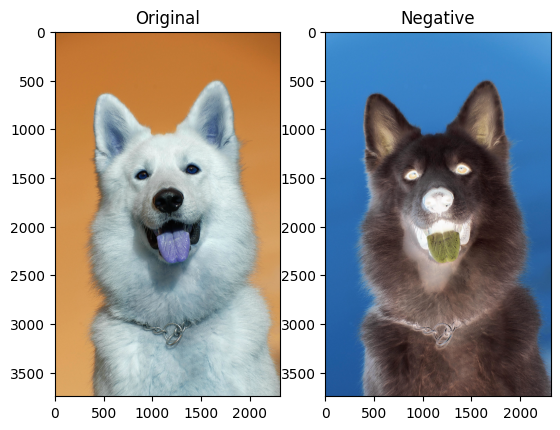

In [23]:
plt.subplot(1,2,1), plt.imshow(image,cmap="gray"), plt.title("Original")
plt.subplot(1,2,2), plt.imshow(img_neg, cmap ="gray"), plt.title("Negative")
plt.show()

**LOG TRANSFORMATION**

<ipython-input-25-43ef11add86f>:2: RuntimeWarning: divide by zero encountered in log
  log_image = c * np.log(1 + image)
<ipython-input-25-43ef11add86f>:3: RuntimeWarning: invalid value encountered in cast
  log_image = np.array(log_image, dtype=np.uint8)


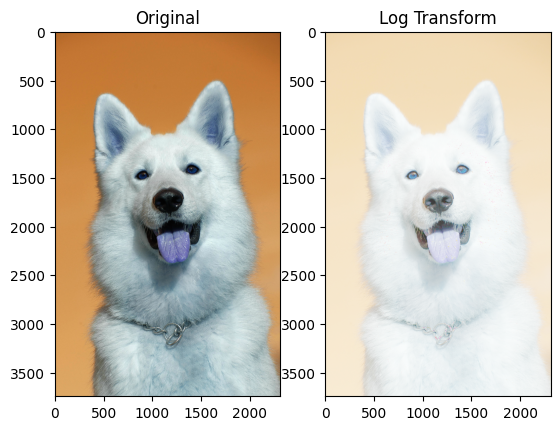

In [25]:
c = 255 / np.log(1 + np.max(image))   #calculating c
log_image = c * np.log(1 + image)     #formula
log_image = np.array(log_image, dtype=np.uint8)   #converting into int

plt.subplot(1, 2, 1), plt.imshow(image, cmap="gray"), plt.title("Original")
plt.subplot(1, 2, 2), plt.imshow(log_image, cmap="gray"), plt.title("Log Transform")
plt.show()


 **Power-Law (Gamma) Transformation**

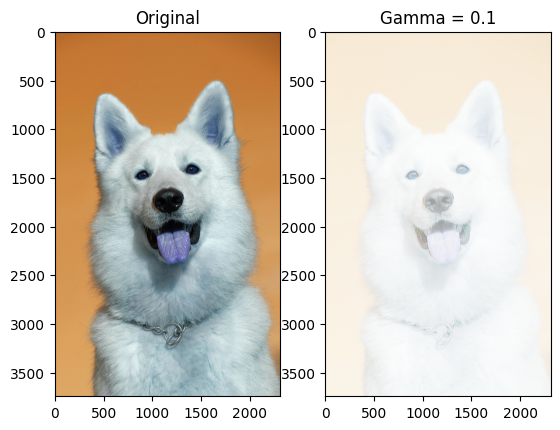

In [55]:
gamma = 0.1 # Try values like 0.5 (brighten) or 2.0 (darken)
c = 255 / (np.max(image) ** gamma)
gamma_image = c * (image ** gamma)
gamma_image = np.array(gamma_image, dtype=np.uint8)

plt.subplot(1, 2, 1), plt.imshow(image, cmap="gray"), plt.title("Original")
plt.subplot(1, 2, 2), plt.imshow(gamma_image, cmap="gray"), plt.title(f"Gamma = {gamma}")
plt.show()


CONTRAST ENHANCEMENT _ LINEAR METHODS
1. NORMALIZATION

In [29]:
r_min,r_max = np.min(image), np.max(image)

In [58]:
stretched = ((image - r_min) * 255) / (r_max - r_min).astype(np.uint8)

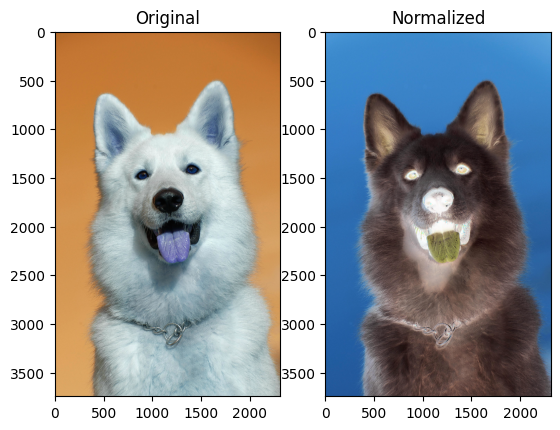

In [59]:
plt.subplot(1, 2, 1), plt.imshow(image, cmap="gray"), plt.title("Original")
plt.subplot(1, 2, 2), plt.imshow(stretched, cmap="gray"), plt.title("Normalized")
plt.show()


2. Brightness and Contrast Adjustment

In [46]:
alpha,beta = 1.5,20
adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

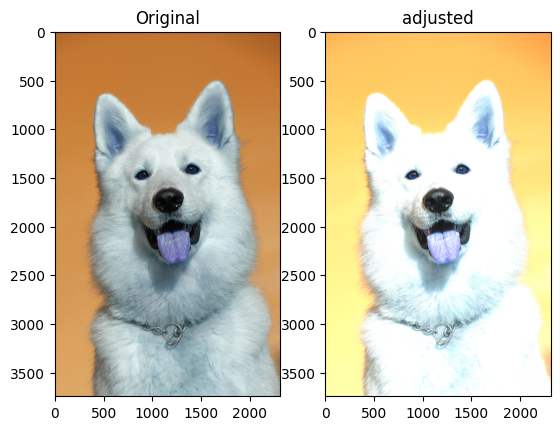

In [47]:
plt.subplot(1, 2, 1), plt.imshow(image, cmap="gray"), plt.title("Original")
plt.subplot(1, 2, 2), plt.imshow(adjusted, cmap="gray"), plt.title("adjusted")
plt.show()


CONTRAST ENHANCEMENT -> 2. Non linear methods
1. Histogram equilization


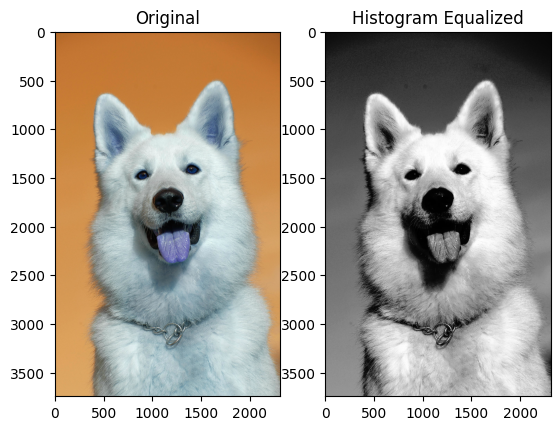

In [49]:
equalized = cv2.equalizeHist(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))

plt.subplot(1, 2, 1), plt.imshow(image, cmap="gray"), plt.title("Original")
plt.subplot(1, 2, 2), plt.imshow(equalized, cmap="gray"), plt.title("Histogram Equalized")
plt.show()

2. Adaptive Histogram Equilization (AHE and CLAHE)

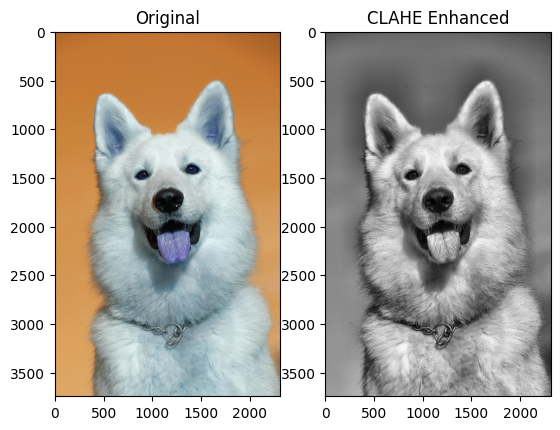

In [53]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
# Convert the image to grayscale before applying CLAHE
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
clahe_image = clahe.apply(gray_image)

plt.subplot(1, 2, 1), plt.imshow(image, cmap="gray"), plt.title("Original")
plt.subplot(1, 2, 2), plt.imshow(clahe_image, cmap="gray"), plt.title("CLAHE Enhanced")
plt.show()

3. LOG TRANFORMATION
4. GAMMA CORRECTION
Done above